In [10]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import statsmodels.api as sm


# in your notebook cell
import sys

# path relative to your notebook
sys.path.insert(0, '../src')

# import as usual
#import functions


In [17]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [12]:
import matplotlib.pyplot as plt
from seaborn import histplot, scatterplot, heatmap

In [14]:
seed = 42

In [2]:
# autoreload
%load_ext autoreload
%autoreload 2

In [9]:
nutrition = pd.read_csv('data/nutrition_physical_activity_and_obesity.csv')
nutrition.shape

(40096, 31)

In [21]:
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40096 entries, 0 to 40095
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   40096 non-null  int64  
 1   YearEnd                     40096 non-null  int64  
 2   LocationAbbr                40096 non-null  object 
 3   LocationDesc                40096 non-null  object 
 4   Datasource                  40096 non-null  object 
 5   Class                       40096 non-null  object 
 6   Topic                       40096 non-null  object 
 7   Question                    40096 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             40096 non-null  object 
 10  Data_Value                  29460 non-null  float64
 11  Data_Value_Alt              29460 non-null  float64
 12  Data_Value_Footnote_Symbol  10636 non-null  object 
 13  Data_Value_Footnote         106

In [15]:
nutrition.describe

<bound method NDFrame.describe of        YearStart  YearEnd LocationAbbr          LocationDesc  \
0           2019     2019           AK                Alaska   
1           2019     2019           AZ               Arizona   
2           2019     2019           DC  District of Columbia   
3           2019     2019           IL              Illinois   
4           2019     2019           MD              Maryland   
...          ...      ...          ...                   ...   
40091       2009     2009           NY              New York   
40092       2003     2003           NH         New Hampshire   
40093       2011     2011           NH         New Hampshire   
40094       2011     2011           AR              Arkansas   
40095       2015     2015           RI          Rhode Island   

                                    Datasource                    Class  \
0      Youth Risk Behavior Surveillance System        Physical Activity   
1      Youth Risk Behavior Surveillance System 

In [16]:
nutrition.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2019,2019,AK,Alaska,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve...,NaN,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q048,VALUE,2,Race/Ethnicity,Asian,RACE,RACEASN
1,2019,2019,AZ,Arizona,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,Value,...,"(34.86597028, -111.763811277)",OWS,OWS1,Q038,VALUE,4,Total,Total,OVR,OVERALL
2,2019,2019,DC,District of Columbia,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,Value,...,"(38.890371385, -77.031961127)",OWS,OWS1,Q038,VALUE,11,Total,Total,OVR,OVERALL
3,2019,2019,IL,Illinois,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who partici...,NaN,Value,...,"(40.485010283, -88.997710178)",PA,PA1,Q049,VALUE,17,Grade,10th,GRADE,GRADE10
4,2019,2019,MD,Maryland,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,NaN,Value,...,"(39.290580964, -76.609260111)",OWS,OWS1,Q039,VALUE,24,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


In [18]:
nutrition.tail()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
40091,2009,2009,NY,New York,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve...,NaN,Value,...,"(42.827001032, -75.543970427)",PA,PA1,Q048,VALUE,36,Gender,Female,GEN,FEMALE
40092,2003,2003,NH,New Hampshire,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,Value,...,"(43.655950113, -71.50036092)",OWS,OWS1,Q038,VALUE,33,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
40093,2011,2011,NH,New Hampshire,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,Value,...,"(43.655950113, -71.50036092)",OWS,OWS1,Q038,VALUE,33,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
40094,2011,2011,AR,Arkansas,Youth Risk Behavior Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume...,NaN,Value,...,"(34.748650124, -92.274490743)",FV,FV1,Q021,VALUE,5,Grade,12th,GRADE,GRADE12
40095,2015,2015,RI,Rhode Island,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve...,NaN,Value,...,"(41.708280193, -71.522470314)",PA,PA1,Q048,VALUE,44,Grade,9th,GRADE,GRADE09


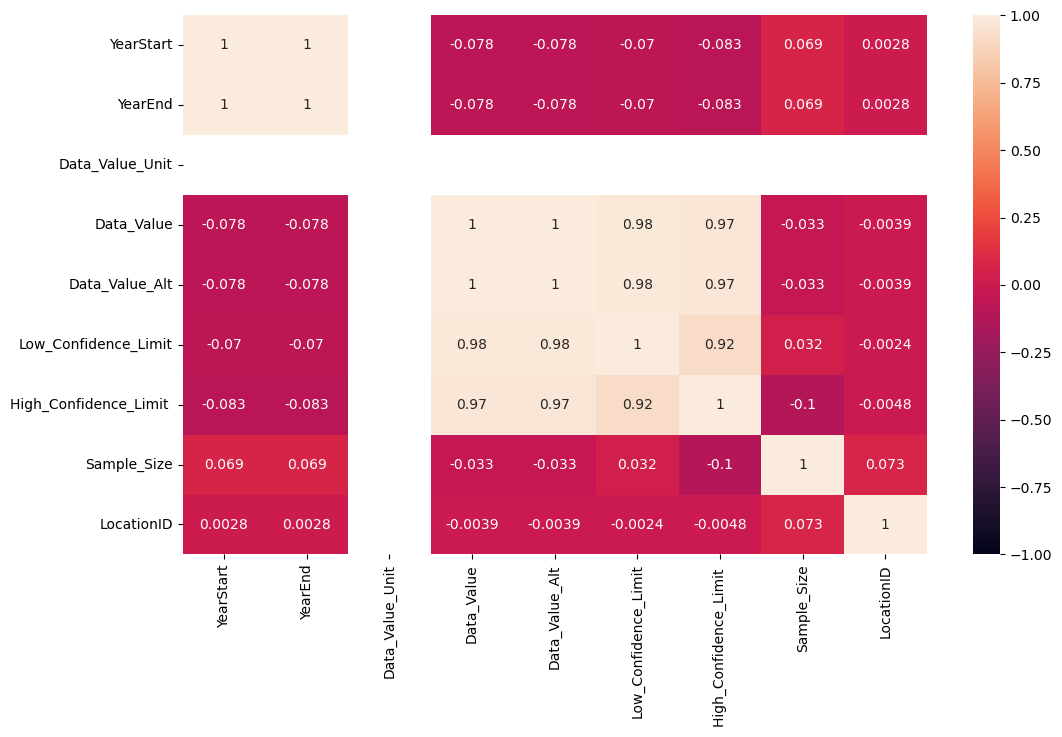

In [20]:
plt.figure(figsize = (12, 7))
sns.heatmap((nutrition).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

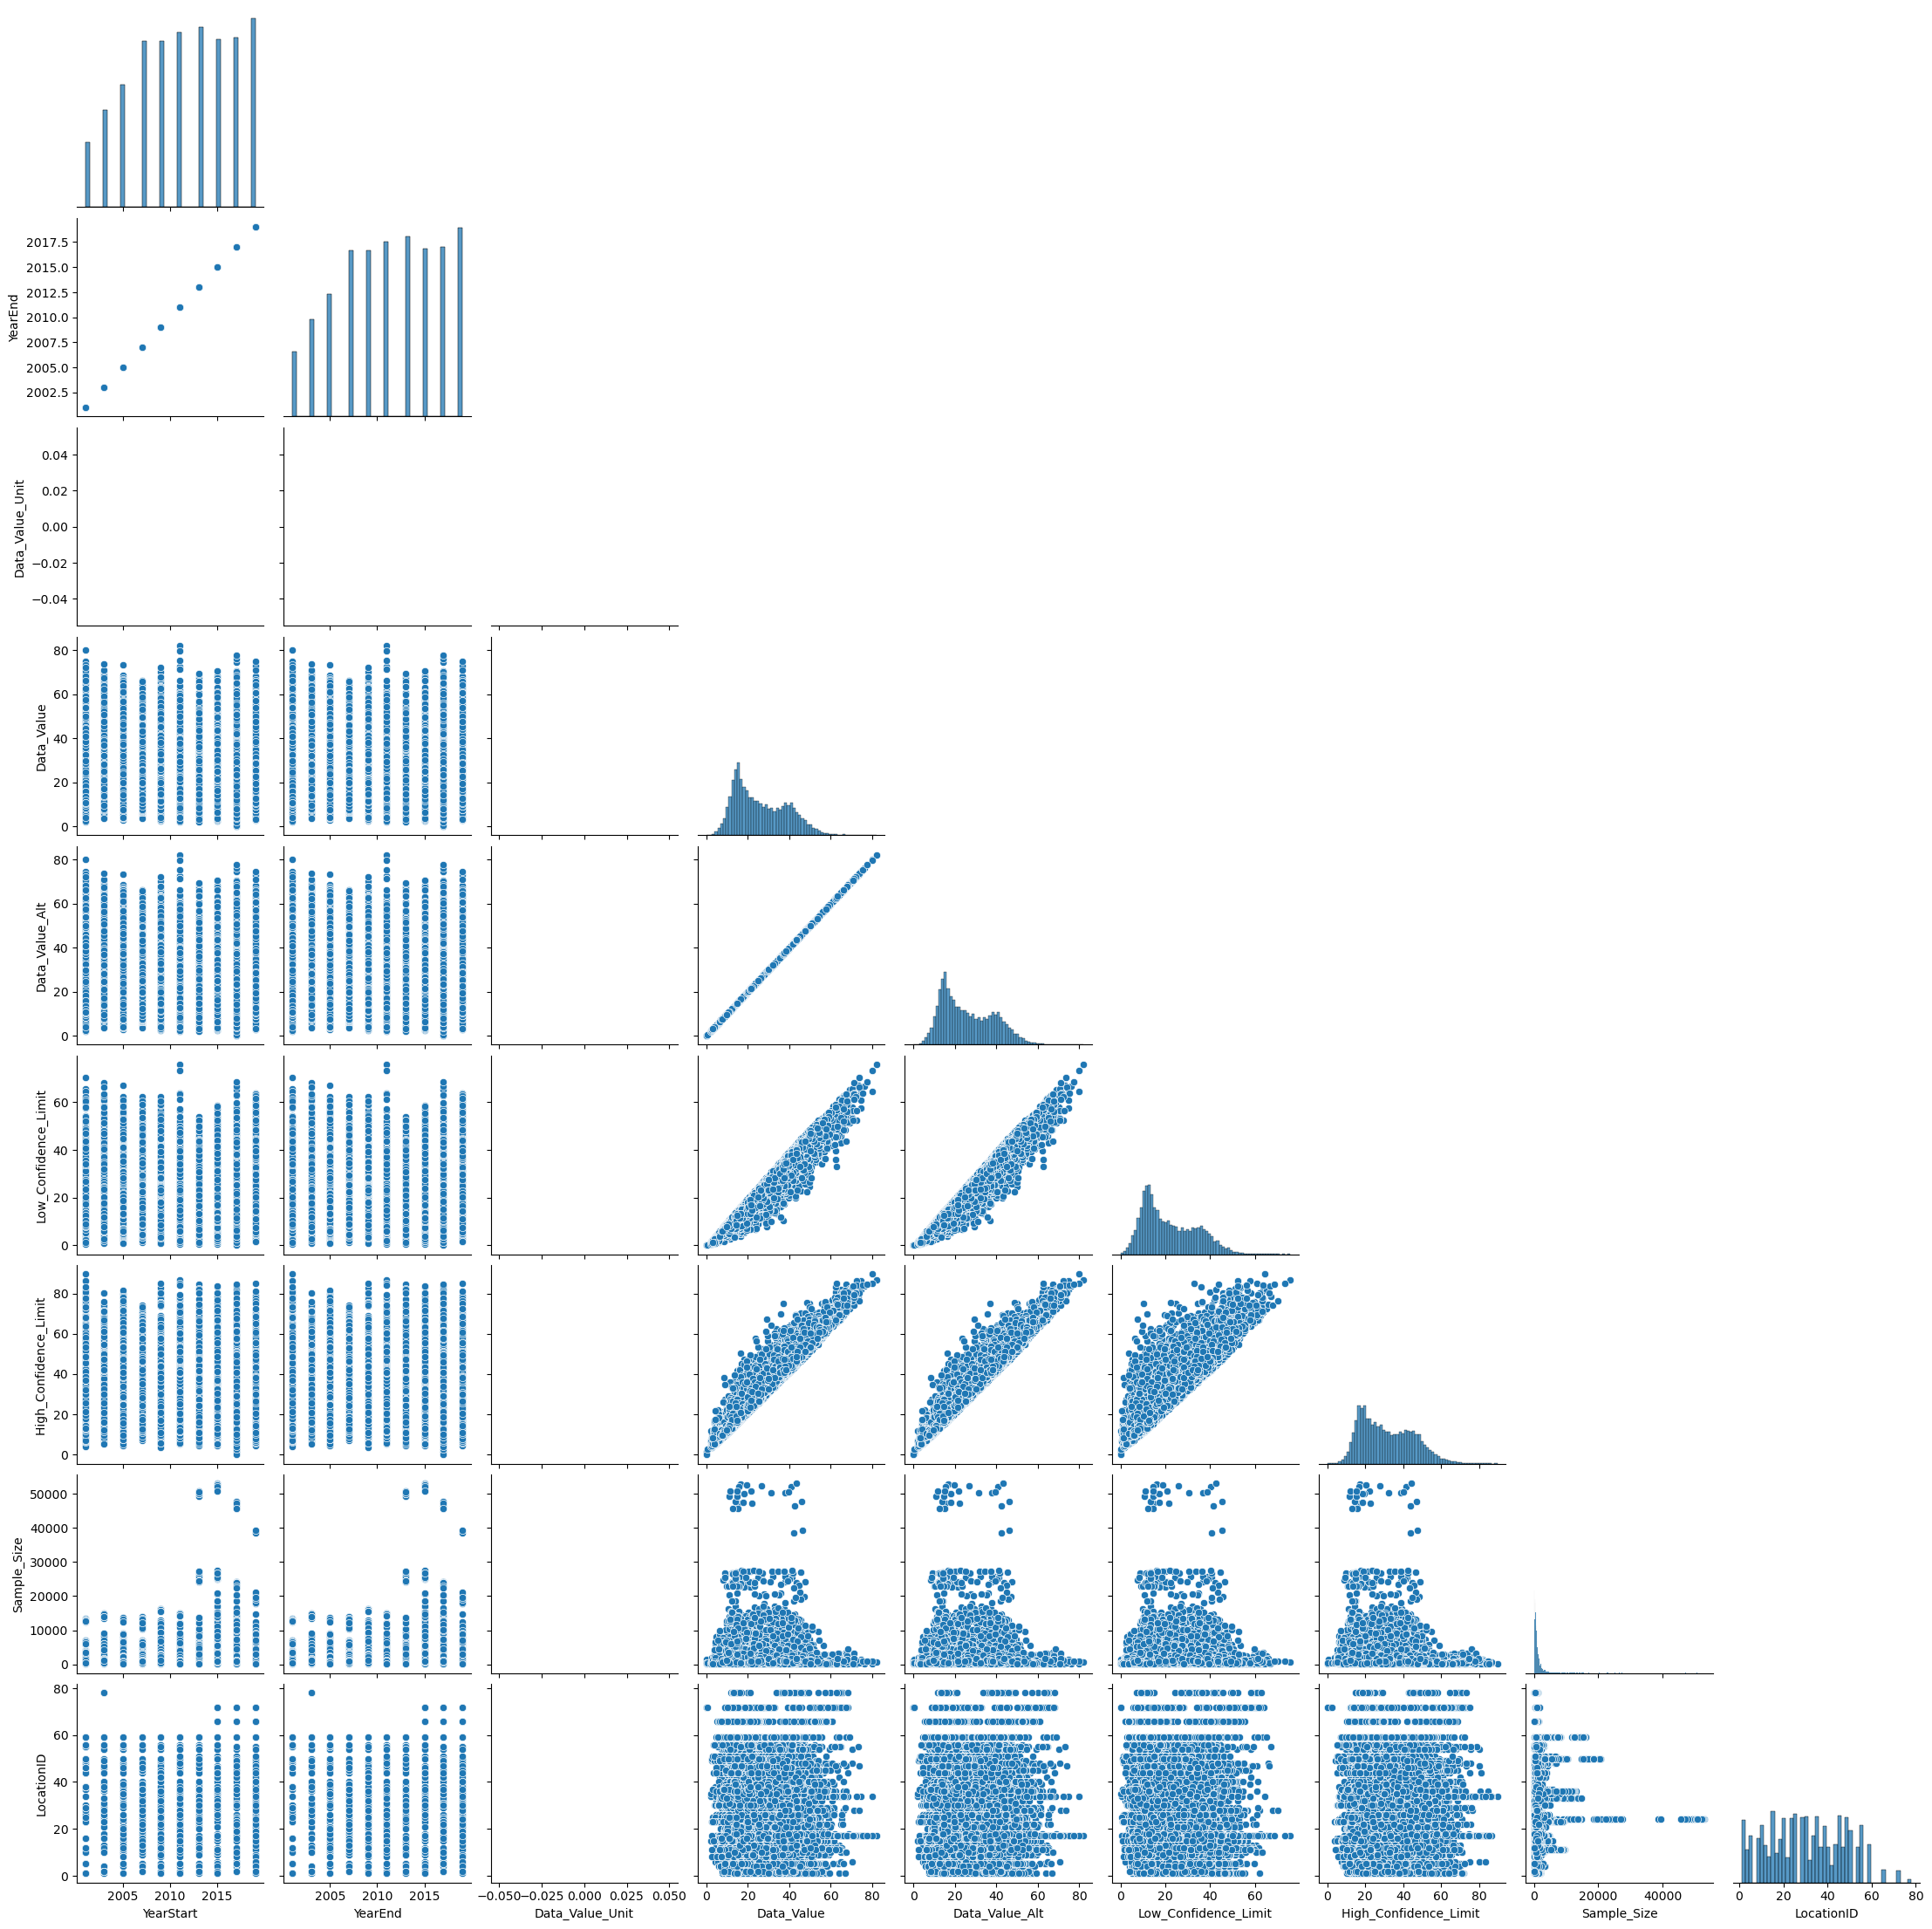

In [22]:
# created a pair plot to identify relationships between variables
sns.pairplot(data=nutrition, corner=True)